In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import math
import matplotlib.pyplot as plt
# import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error as mse
from tensorflow import keras

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.ensemble import RandomForestRegressor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skrr-day-off-2018/Day_off.csv
/kaggle/input/gwangyang-weather-2018/ta_20231128032728.csv
/kaggle/input/ta-20231128040208-csv/ta_20231128040208.csv
/kaggle/input/day-off/Day_off.xlsx
/kaggle/input/steel-industry-energy-consumption/Steel_industry_data.csv


In [2]:
data = pd.read_csv("/kaggle/input/steel-industry-energy-consumption/Steel_industry_data.csv")
data['day'] = pd.to_datetime(data['date'], dayfirst=True).dt.day
data['month'] = pd.to_datetime(data['date'], dayfirst=True).dt.month
data['year'] = pd.to_datetime(data['date'], dayfirst=True).dt.year
data['time'] = pd.to_datetime(data['date']).dt.time
data['date'] = pd.to_datetime(data['date'], dayfirst=True).dt.date

In [3]:
data.head(100)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year,time
0,2018-01-01,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,2018,00:15:00
1,2018-01-01,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,2018,00:30:00
2,2018-01-01,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,2018,00:45:00
3,2018-01-01,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,2018,01:00:00
4,2018-01-01,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,2018,01:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01,3.42,3.46,0.0,0.0,70.30,100.0,0,Weekday,Monday,Light_Load,1,1,2018,00:00:00
96,2018-01-02,3.20,3.10,0.0,0.0,71.82,100.0,900,Weekday,Tuesday,Light_Load,2,1,2018,00:15:00
97,2018-01-02,3.85,4.61,0.0,0.0,64.10,100.0,1800,Weekday,Tuesday,Light_Load,2,1,2018,00:30:00
98,2018-01-02,3.28,3.67,0.0,0.0,66.64,100.0,2700,Weekday,Tuesday,Light_Load,2,1,2018,00:45:00


In [4]:
!pip install openpyxl==3.0.9

     |████████████████████████████████| 242 kB 1.4 MB/s            


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


CPU times: user 2.59 s, sys: 120 ms, total: 2.71 s
Wall time: 2.71 s
Mean Squared Error: 4.894265231149434


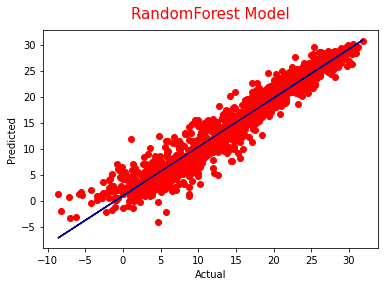

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year,time,mean_temp
0,2018-01-01,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load,1,1,2018,00:15:00,4.5996
1,2018-01-01,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load,1,1,2018,00:30:00,4.5996
2,2018-01-01,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load,1,1,2018,00:45:00,4.5996
3,2018-01-01,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load,1,1,2018,01:00:00,4.5996
4,2018-01-01,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load,1,1,2018,01:15:00,4.5996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load,31,12,2018,23:00:00,2.0854
35036,2018-12-31,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load,31,12,2018,23:15:00,2.0854
35037,2018-12-31,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load,31,12,2018,23:30:00,2.0854
35038,2018-12-31,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load,31,12,2018,23:45:00,2.0854


In [5]:
date_data = pd.read_csv("/kaggle/input/ta-20231128040208-csv/ta_20231128040208.csv", encoding='euc-kr',skiprows=8, header=None)
date_data = date_data.dropna()
date_data = date_data.iloc[:, [0,2,3,4]]
date_data.iloc[:, 0] = date_data.iloc[:, 0].str.replace(r'\t', '')
date_data = date_data.rename(columns={0: 'date', 2: 'mean_temp', 3: 'min_temp', 4: 'max_temp',})
date_data['day'] = pd.to_datetime(date_data['date'], dayfirst=True).dt.day
date_data['month'] = pd.to_datetime(date_data['date'], dayfirst=True).dt.month
date_data['year'] = pd.to_datetime(date_data['date'], dayfirst=True).dt.year

X = date_data.loc[:, ['day', 'month', 'year']]
y = date_data.loc[:, 'mean_temp']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

#deep learning keras model with one relu layer created
rf_model = RandomForestRegressor(n_estimators=500)

%time history = rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(f"Mean Squared Error: {mse(y_pred, y_test)}")

#visualization of the graph
x = y_test
y = y_pred
plt.title(f'RandomForest Model', fontsize = 15, color = 'r', pad = 12)
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


# save our model
import pickle

pickle.dump(rf_model,open("rf_model.h5","wb"))

sc_data = scaler.fit_transform(data.loc[:, ['day', 'month', 'year']])
data['mean_temp'] = rf_model.predict(sc_data)
data

In [6]:
data = data.drop(['Leading_Current_Reactive_Power_kVarh', 'Load_Type', 'Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)', 'NSM', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor'], axis=1)

In [7]:
day_off = pd.read_excel('/kaggle/input/day-off/Day_off.xlsx', index_col=None, header=None)

In [8]:
day_off = day_off.rename(columns={0: 'date'}).copy()
day_off['holyday'] = 0
day_off['date'] = pd.to_datetime(day_off['date']).dt.date
day_off.sort_values(by=['date'])
day_off.drop([1,2,3,4,5,7,8,9,10,11])

,date,holyday
0,2018-01-01,0
6,2018-05-22,0
12,2018-09-25,0
13,2018-09-26,0
14,2018-03-10,0
15,2018-09-10,0
16,2018-12-25,0


In [9]:
data['Usage_kWh'] = data['Usage_kWh']/4

In [10]:
q = data.groupby(['date'])['Usage_kWh'].sum().reset_index()
q['day_usage'] = q['Usage_kWh']
q = q.drop('Usage_kWh', axis=1)
q

,date,day_usage
0,2018-01-01,87.9650
1,2018-01-02,987.6075
2,2018-01-03,890.2625
3,2018-01-04,1244.4300
4,2018-01-05,1170.8500
...,...,...
360,2018-12-27,653.4675
361,2018-12-28,459.6450
362,2018-12-29,94.3550
363,2018-12-30,84.8000


In [11]:
data = pd.merge(data, q, on='date', how='left')
data

,date,Usage_kWh,WeekStatus,Day_of_week,day,month,year,time,mean_temp,day_usage
0,2018-01-01,0.7925,Weekday,Monday,1,1,2018,00:15:00,4.5996,87.965
1,2018-01-01,1.0000,Weekday,Monday,1,1,2018,00:30:00,4.5996,87.965
2,2018-01-01,0.8100,Weekday,Monday,1,1,2018,00:45:00,4.5996,87.965
3,2018-01-01,0.8275,Weekday,Monday,1,1,2018,01:00:00,4.5996,87.965
4,2018-01-01,0.9550,Weekday,Monday,1,1,2018,01:15:00,4.5996,87.965
...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31,0.9625,Weekday,Monday,31,12,2018,23:00:00,2.0854,84.770
35036,2018-12-31,0.9350,Weekday,Monday,31,12,2018,23:15:00,2.0854,84.770
35037,2018-12-31,0.9450,Weekday,Monday,31,12,2018,23:30:00,2.0854,84.770
35038,2018-12-31,0.9450,Weekday,Monday,31,12,2018,23:45:00,2.0854,84.770


In [12]:
data = pd.merge(data, day_off, on='date', how='left').fillna(1)
data

,date,Usage_kWh,WeekStatus,Day_of_week,day,month,year,time,mean_temp,day_usage,holyday
0,2018-01-01,0.7925,Weekday,Monday,1,1,2018,00:15:00,4.5996,87.965,0.0
1,2018-01-01,1.0000,Weekday,Monday,1,1,2018,00:30:00,4.5996,87.965,0.0
2,2018-01-01,0.8100,Weekday,Monday,1,1,2018,00:45:00,4.5996,87.965,0.0
3,2018-01-01,0.8275,Weekday,Monday,1,1,2018,01:00:00,4.5996,87.965,0.0
4,2018-01-01,0.9550,Weekday,Monday,1,1,2018,01:15:00,4.5996,87.965,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31,0.9625,Weekday,Monday,31,12,2018,23:00:00,2.0854,84.770,1.0
35036,2018-12-31,0.9350,Weekday,Monday,31,12,2018,23:15:00,2.0854,84.770,1.0
35037,2018-12-31,0.9450,Weekday,Monday,31,12,2018,23:30:00,2.0854,84.770,1.0
35038,2018-12-31,0.9450,Weekday,Monday,31,12,2018,23:45:00,2.0854,84.770,1.0


# Usage Pattern Based on day of the week 
As you can see the Industry Energy Consumption is high on the weekdays and low on the weekends.
The highest Industry Energy Consumption is seen on Thursday and lowest on Sunday, likewise for the Lagging Current reactive power.

# Usage Pattern Based on month of year 
As you can see the Industry Energy Consumption is highiest on January and lowest on September

In [13]:
data = data.drop("date",axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Usage_kWh    35040 non-null  float64
 1   WeekStatus   35040 non-null  object 
 2   Day_of_week  35040 non-null  object 
 3   day          35040 non-null  int64  
 4   month        35040 non-null  int64  
 5   year         35040 non-null  int64  
 6   time         35040 non-null  object 
 7   mean_temp    35040 non-null  float64
 8   day_usage    35040 non-null  float64
 9   holyday      35040 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.9+ MB


In [14]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Day_of_week'] = le.fit_transform(data['Day_of_week'])

data['time'] = le.fit_transform(data['time'])

data

,Usage_kWh,WeekStatus,Day_of_week,day,month,year,time,mean_temp,day_usage,holyday
0,0.7925,Weekday,1,1,1,2018,1,4.5996,87.965,0.0
1,1.0000,Weekday,1,1,1,2018,2,4.5996,87.965,0.0
2,0.8100,Weekday,1,1,1,2018,3,4.5996,87.965,0.0
3,0.8275,Weekday,1,1,1,2018,4,4.5996,87.965,0.0
4,0.9550,Weekday,1,1,1,2018,5,4.5996,87.965,0.0
...,...,...,...,...,...,...,...,...,...,...
35035,0.9625,Weekday,1,31,12,2018,92,2.0854,84.770,1.0
35036,0.9350,Weekday,1,31,12,2018,93,2.0854,84.770,1.0
35037,0.9450,Weekday,1,31,12,2018,94,2.0854,84.770,1.0
35038,0.9450,Weekday,1,31,12,2018,95,2.0854,84.770,1.0


In [15]:

day_status ={
    'Weekday': 1,
    'Weekend': 0
}
data['WeekStatus'] = data['WeekStatus'].map(day_status)

In [16]:
data['workday'] = data['WeekStatus'] * data['holyday']

In [17]:
data['previous_day_Usage_kWh'] = data['day_usage'].shift(96).fillna(84.77)
data

,Usage_kWh,WeekStatus,Day_of_week,day,month,year,time,mean_temp,day_usage,holyday,workday,previous_day_Usage_kWh
0,0.7925,1,1,1,1,2018,1,4.5996,87.965,0.0,0.0,84.77
1,1.0000,1,1,1,1,2018,2,4.5996,87.965,0.0,0.0,84.77
2,0.8100,1,1,1,1,2018,3,4.5996,87.965,0.0,0.0,84.77
3,0.8275,1,1,1,1,2018,4,4.5996,87.965,0.0,0.0,84.77
4,0.9550,1,1,1,1,2018,5,4.5996,87.965,0.0,0.0,84.77
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,0.9625,1,1,31,12,2018,92,2.0854,84.770,1.0,1.0,84.80
35036,0.9350,1,1,31,12,2018,93,2.0854,84.770,1.0,1.0,84.80
35037,0.9450,1,1,31,12,2018,94,2.0854,84.770,1.0,1.0,84.80
35038,0.9450,1,1,31,12,2018,95,2.0854,84.770,1.0,1.0,84.80


In [18]:
# data['Day_of_week'] = data['Day_of_week']*data['holyday']

In [19]:
X = data.drop(columns=['Usage_kWh' , 'day_usage','year', 'time', 'holyday'], axis = 1)
y = data['day_usage']

In [20]:
X.corr()

,WeekStatus,Day_of_week,day,month,mean_temp,workday,previous_day_Usage_kWh
WeekStatus,1.000000,0.156082,0.009617,-0.012839,-0.009952,0.913280,0.116016
Day_of_week,0.156082,1.000000,0.008167,-0.009515,0.000556,0.097684,0.232514
day,0.009617,0.008167,1.000000,0.011893,0.003123,0.010671,-0.002850
month,-0.012839,-0.009515,0.011893,1.000000,0.225412,0.010314,-0.233959
mean_temp,-0.009952,0.000556,0.003123,0.225412,1.000000,0.000003,-0.233693
workday,0.913280,0.097684,0.010671,0.010314,0.000003,1.000000,0.134378
previous_day_Usage_kWh,0.116016,0.232514,-0.002850,-0.233959,-0.233693,0.134378,1.000000


In [21]:
X

,WeekStatus,Day_of_week,day,month,mean_temp,workday,previous_day_Usage_kWh
0,1,1,1,1,4.5996,0.0,84.77
1,1,1,1,1,4.5996,0.0,84.77
2,1,1,1,1,4.5996,0.0,84.77
3,1,1,1,1,4.5996,0.0,84.77
4,1,1,1,1,4.5996,0.0,84.77
...,...,...,...,...,...,...,...
35035,1,1,31,12,2.0854,1.0,84.80
35036,1,1,31,12,2.0854,1.0,84.80
35037,1,1,31,12,2.0854,1.0,84.80
35038,1,1,31,12,2.0854,1.0,84.80


In [22]:
import calendar

def count_weekend_days(year):
    total_saturdays = 0
    total_sundays = 0

    # Проходимо по кожному місяцю у році
    for month in range(1, 13):
        # Знаходимо кількість днів у місяці та перший день місяця (weekday)
        _, days_in_month = calendar.monthrange(year, month)
        first_day_of_month = calendar.weekday(year, month, 1)

        # Підраховуємо кількість субот та неділь у місяці
        for day in range(1, days_in_month + 1):
            current_day = calendar.weekday(year, month, day)
            if current_day == calendar.SATURDAY:
                total_saturdays += 1
            elif current_day == calendar.SUNDAY:
                total_sundays += 1

    return total_saturdays, total_sundays

# Задаємо рік, для якого хочемо знати кількість субот та неділь
year_to_check = 2023

# Отримуємо результат
saturdays, sundays = count_weekend_days(year_to_check)

# Виводимо результат
print(f"Кількість субот у {year_to_check} році: {saturdays}")
print(f"Кількість неділь у {year_to_check} році: {sundays}")


Кількість субот у 2023 році: 52
Кількість неділь у 2023 році: 53


# Feature Selcetion using Lasso model
Important features are selected using the Lasso model.

# Standard scaling of data
Using the Standard Scaler function transformed the data to a scaled form

In [23]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline

# features_to_scale = ['Day_of_week', 'day', 'month', 'mean_temp', 'previous_day_Usage_kWh']
# unchanged_features = ['workday']
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('scaled_features', StandardScaler(), features_to_scale),
#         ('unchanged_features', 'passthrough', unchanged_features)
#     ],
#     remainder='drop'
# )
# pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# sc_data = pipeline.fit_transform(X)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_filtered_scalar = scaler.fit_transform(X)
X_filtered_scalar

array([[1.        , 0.16666667, 0.        , ..., 0.2086797 , 0.        ,
        0.01122297],
       [1.        , 0.16666667, 0.        , ..., 0.2086797 , 0.        ,
        0.01122297],
       [1.        , 0.16666667, 0.        , ..., 0.2086797 , 0.        ,
        0.01122297],
       ...,
       [1.        , 0.16666667, 1.        , ..., 0.13355405, 1.        ,
        0.01123988],
       [1.        , 0.16666667, 1.        , ..., 0.13355405, 1.        ,
        0.01123988],
       [1.        , 0.16666667, 1.        , ..., 0.13355405, 1.        ,
        0.01123988]])

# Model Training
Trained LinearRegression, Ridge, Lasso and Deeplearning model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered_scalar, y, test_size = 0.3, random_state = 42)

CPU times: user 15.2 ms, sys: 15.9 ms, total: 31.1 ms
Wall time: 25.2 ms
Mean Squared Error :  56315.773410189155


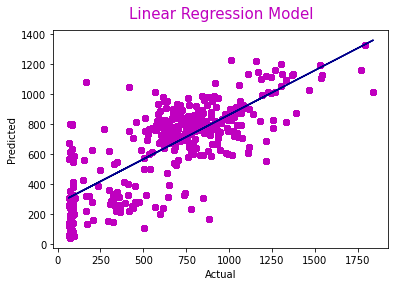

In [26]:
#Linear Regression Model
lr = LinearRegression()
%time lr.fit(X_train, y_train)

#prediction
y_pred = lr.predict(X_test)
#check MSE
print('Mean Squared Error : ', mse(y_test, y_pred))

#visualize model
x = y_test
y = y_pred

plt.title('Linear Regression Model', fontsize = 15, color = 'm', pad = 12)
plt.plot(x, y, 'o', color = 'm')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

CPU times: user 5.28 s, sys: 705 ms, total: 5.98 s
Wall time: 1.84 s
Mean Squared Error :  4.044250387351793e-16


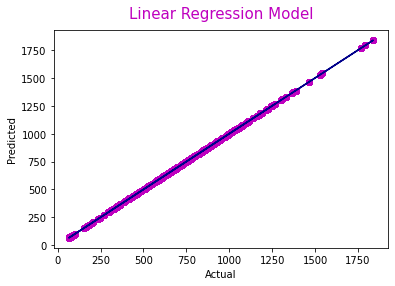

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(5)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

%time lr.fit(X_poly_train, y_train)

#prediction
y_pred = lr.predict(X_poly_test)
#check MSE
print('Mean Squared Error : ', mse(y_test, y_pred))

#visualize model
x = y_test
y = y_pred

plt.title('Linear Regression Model', fontsize = 15, color = 'm', pad = 12)
plt.plot(x, y, 'o', color = 'm')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

CPU times: user 6.57 ms, sys: 9.87 ms, total: 16.4 ms
Wall time: 8.79 ms
Mean Squared Error :  56315.63547047036


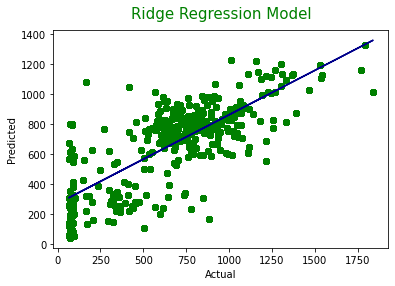

In [28]:
#Ridge Regression Model
ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train, y_train)

#prediction
y_pred = ridge.predict(X_test)
#check MSE
print('Mean Squared Error : ', mse(y_test, y_pred))

#visualize model
x = y_test
y = y_pred

plt.title('Ridge Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'g')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

CPU times: user 13min 36s, sys: 2min 17s, total: 15min 54s
Wall time: 11min 23s
Mean Squared Error: 1183.788173127459


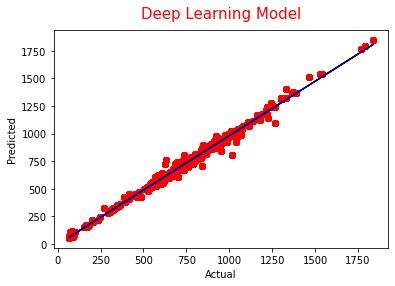

In [29]:
#deep learning keras model with one relu layer created
model = keras.Sequential()
model.add(Dense(20, activation='relu', input_shape=[len(X_poly_train[0])]))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

#compiling the model with adam optimiser and mse loss metrics
model.compile(optimizer= 'adam', loss='mse', metrics=['mse'])
%time history = model.fit(X_poly_train, y_train, epochs=500, verbose=0)

y_pred = model.predict(X_poly_test)
print(f"Mean Squared Error: {mse(y_pred, y_test)}")

#visualization of the graph
x = y_test
y = y_pred
plt.title(f'Deep Learning Model', fontsize = 15, color = 'r', pad = 12)
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [30]:
# model.save()

# Conclusion
This clearly shows that the deep learning model with one hidden layer perfoms the best with the lowest MSE

In [31]:
X_poly = poly.fit_transform(X_filtered_scalar)
X_poly.shape

(35040, 792)

In [32]:
data.shape

(35040, 12)

In [33]:
data['perdikt'] = model.predict(X_poly)
data.head()

,Usage_kWh,WeekStatus,Day_of_week,day,month,year,time,mean_temp,day_usage,holyday,workday,previous_day_Usage_kWh,perdikt
0,0.7925,1,1,1,1,2018,1,4.5996,87.965,0.0,0.0,84.77,83.571487
1,1.0000,1,1,1,1,2018,2,4.5996,87.965,0.0,0.0,84.77,83.571487
2,0.8100,1,1,1,1,2018,3,4.5996,87.965,0.0,0.0,84.77,83.571487
3,0.8275,1,1,1,1,2018,4,4.5996,87.965,0.0,0.0,84.77,83.571487
4,0.9550,1,1,1,1,2018,5,4.5996,87.965,0.0,0.0,84.77,83.571487


In [34]:
data.iloc[4498,:]

Usage_kWh                    0.810000
WeekStatus                   1.000000
Day_of_week                  0.000000
day                         16.000000
month                        2.000000
year                      2018.000000
time                        83.000000
mean_temp                    8.150600
day_usage                   82.910000
holyday                      1.000000
workday                      1.000000
previous_day_Usage_kWh      83.635000
perdikt                    114.078491
Name: 4498, dtype: float64